In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Variables:

- $q$: number of (shifted) Legendre polynomials to use
- $\mathcal{P}_t$: the vector of $q$ (shifted) Legendre polynomials, evaluated at $t$
- $M$: a ($q \times q$) matrix

Definition:
- Let $C_t = \mathcal{P}_t \times \mathcal{P}_t$ (the $q \times q$ matrix formed by the outer product of $\mathcal{P}_t$ with itself)

Question:
- Is there a nice way to compute the following:
  - $\mathcal{M} = \int_0^1C_t M C_t dt $
  - $\mathcal{C} = \int_0^1C_t dt$
  
  (and yes, these seem like really weird things to want to compute, but they turn out to be useful for learning....)

There's a nice closed-form answer for the second of these, but I found it by obervation rather than by solving:

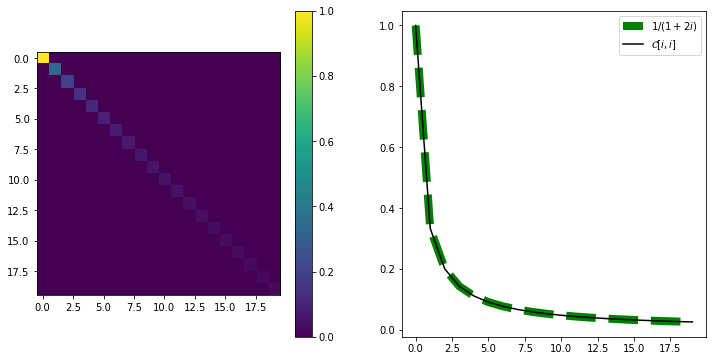

In [2]:
from scipy.special import legendre

q = 20
n_steps = 100000
t = np.linspace(0, 1, n_steps)
P = np.asarray([legendre(i)(2*t - 1) for i in range(q)]).T

total = np.zeros((q,q))
for Pt in P:
    Ct = np.outer(Pt, Pt)
    total += Ct / n_steps
    
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(total)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.plot(1.0/(1+np.arange(q)*2), c='g', lw=8, ls='--', label='$1/(1+2i)$')
plt.plot(np.diag(total), label=r'$\mathcal{C}[i,i]$', c='k')
plt.legend()
plt.show()

That seems to indicate this identity:

$\mathcal{C}[i,j] = 
     \begin{cases}
         1/(1+2i), & \text{if}\ i=j \\
         0, & \text{otherwise}
    \end{cases}
$

This is useful, but is there a way to show this?  And is there something similarly nice for $\int_0^1C_t M C_t dt $?

## Update

Aaron pointed out to me that this identity I found is actually right on the wikipedia page for Legendre polynomials:  https://en.wikipedia.org/wiki/Legendre_polynomials#Orthonormality_and_completeness.  Because that's really just the dot product of all the legendre polynomials with each other.  The fact that it's purely diagonal is because they are orthoganal.  The fact that it's *not* an identity matrix is because they are not an orthonormal basis.  Rather, they've been scaled to fit nicely between -1 and 1.

So, that leaves us with $\mathcal{M} = \int_0^1C_t M C_t dt $.  What can we do with this?  Well, let's just go ahead and compute it symbolically.

In [55]:
import sympy
t = sympy.Symbol('t')

def leg_poly(n):
    # from https://en.wikipedia.org/wiki/Legendre_polynomials#Rodrigues'_formula_and_other_explicit_formulas
    return 1 /(sympy.Rational(2**n * np.math.factorial(n))) * sympy.diff((t**2-1)**n,t,n) 
    #return sympy.sqrt((sympy.Rational(2*n+1))/2) /(sympy.Rational(2**n * np.math.factorial(n))) * sympy.diff((t**2-1)**n,t,n) 

def compute_M(q):
    P = sympy.Matrix([leg_poly(i) for i in range(q)])
    C = P*P.T
    M = sympy.Matrix([[sympy.Symbol('m_{%d,%d}'%(i,j)) for i in range(q)] for j in range(q)])
    # note that we integrate from -1 to 1 and then divide by 2 as these are the non-shifted Legendre Polynomials
    return sympy.integrate(C*M*C, (t, -1, 1))/2  

In [51]:
compute_M(q=1)

Matrix([[m_{0,0}]])

In [52]:
compute_M(q=2)

Matrix([
[  m_{0,0} + m_{1,1}/3, m_{0,1}/3 + m_{1,0}/3],
[m_{0,1}/3 + m_{1,0}/3, m_{0,0}/3 + m_{1,1}/5]])

In [53]:
compute_M(q=3)

Matrix([
[                    m_{0,0} + m_{1,1}/3 + m_{2,2}/5,                  m_{0,1}/3 + m_{1,0}/3 + 2*m_{1,2}/15 + 2*m_{2,1}/15,                     m_{0,2}/5 + 2*m_{1,1}/15 + m_{2,0}/5 + 2*m_{2,2}/35],
[m_{0,1}/3 + m_{1,0}/3 + 2*m_{1,2}/15 + 2*m_{2,1}/15, m_{0,0}/3 + 2*m_{0,2}/15 + m_{1,1}/5 + 2*m_{2,0}/15 + 11*m_{2,2}/105,           2*m_{0,1}/15 + 2*m_{1,0}/15 + 11*m_{1,2}/105 + 11*m_{2,1}/105],
[m_{0,2}/5 + 2*m_{1,1}/15 + m_{2,0}/5 + 2*m_{2,2}/35,        2*m_{0,1}/15 + 2*m_{1,0}/15 + 11*m_{1,2}/105 + 11*m_{2,1}/105, m_{0,0}/5 + 2*m_{0,2}/35 + 11*m_{1,1}/105 + 2*m_{2,0}/35 + 3*m_{2,2}/35]])

In [54]:
compute_M(q=4)

Matrix([
[                                                      m_{0,0} + m_{1,1}/3 + m_{2,2}/5 + m_{3,3}/7,                                         m_{0,1}/3 + m_{1,0}/3 + 2*m_{1,2}/15 + 2*m_{2,1}/15 + 3*m_{2,3}/35 + 3*m_{3,2}/35,                             m_{0,2}/5 + 2*m_{1,1}/15 + 3*m_{1,3}/35 + m_{2,0}/5 + 2*m_{2,2}/35 + 3*m_{3,1}/35 + 4*m_{3,3}/105,                                               m_{0,3}/7 + 3*m_{1,2}/35 + 3*m_{2,1}/35 + 4*m_{2,3}/105 + m_{3,0}/7 + 4*m_{3,2}/105],
[                m_{0,1}/3 + m_{1,0}/3 + 2*m_{1,2}/15 + 2*m_{2,1}/15 + 3*m_{2,3}/35 + 3*m_{3,2}/35,       m_{0,0}/3 + 2*m_{0,2}/15 + m_{1,1}/5 + 2*m_{1,3}/35 + 2*m_{2,0}/15 + 11*m_{2,2}/105 + 2*m_{3,1}/35 + 23*m_{3,3}/315,     2*m_{0,1}/15 + 3*m_{0,3}/35 + 2*m_{1,0}/15 + 11*m_{1,2}/105 + 11*m_{2,1}/105 + 2*m_{2,3}/35 + 3*m_{3,0}/35 + 2*m_{3,2}/35,                      3*m_{0,2}/35 + 2*m_{1,1}/35 + 23*m_{1,3}/315 + 3*m_{2,0}/35 + 2*m_{2,2}/35 + 23*m_{3,1}/315 + 12*m_{3,3}/385],
[m_{0,2}/5 + 2*m_{1,1}/15 +

Hmm...  now that is a very interesting structure.  I'm even more convinced that there's a nice compact way of writing that, but I have no idea what it is, and probably involves a lot more Pure Math than I know.  Also, this approach works fine, but starts taking longer and longer as q gets bigger.  But we should be able to just compute the coefficients on each entry in the $M$ matrix, giving us $W$, a 6x6x36 tensor where $\mathcal{M} = W vec(M)$.

We can do this by doing the same computation, but using an M matrix that is all zeros except for a single 1 and changing where that 1 is.

In [59]:
def basis_matrix(q, i, j):
    P = sympy.Matrix([leg_poly(i) for i in range(q)])
    C = P*P.T
    m = sympy.Matrix([[1 if (i==ii and j==jj) else 0 for ii in range(q)] for jj in range(q)])
    return sympy.integrate(C*sympy.Matrix(m)*C, (t, -1, 1))/2

q = 6
w = []
for i in range(q):
    for j in range(q):
        w.append(np.array(basis_matrix(q=q, i=i, j=j)))
w = np.array(w)

w

array([[[1, 0, 0, 0, 0, 0],
        [0, 1/3, 0, 0, 0, 0],
        [0, 0, 1/5, 0, 0, 0],
        [0, 0, 0, 1/7, 0, 0],
        [0, 0, 0, 0, 1/9, 0],
        [0, 0, 0, 0, 0, 1/11]],

       [[0, 1/3, 0, 0, 0, 0],
        [1/3, 0, 2/15, 0, 0, 0],
        [0, 2/15, 0, 3/35, 0, 0],
        [0, 0, 3/35, 0, 4/63, 0],
        [0, 0, 0, 4/63, 0, 5/99],
        [0, 0, 0, 0, 5/99, 0]],

       [[0, 0, 1/5, 0, 0, 0],
        [0, 2/15, 0, 3/35, 0, 0],
        [1/5, 0, 2/35, 0, 2/35, 0],
        [0, 3/35, 0, 4/105, 0, 10/231],
        [0, 0, 2/35, 0, 20/693, 0],
        [0, 0, 0, 10/231, 0, 10/429]],

       ...,

       [[0, 0, 10/231, 0, 20/1001, 0],
        [0, 20/693, 0, 30/1001, 0, 18/1001],
        [10/231, 0, 68/3003, 0, 25/1001, 0],
        [0, 30/1001, 0, 20/1001, 0, 433/17017],
        [20/1001, 0, 25/1001, 0, 100/4641, 0],
        [0, 18/1001, 0, 433/17017, 0, 4540/323323]],

       [[0, 5/99, 0, 20/1001, 0, 2/143],
        [5/99, 0, 290/9009, 0, 50/3003, 0],
        [0, 290/9009, 0, 25/1

Or we can do the same thing a little more efficiently by doing slices through the $\mathcal{C}$ matrix, since that's all the $M$ matrix is doing.

In [60]:
def basis_matrix(q, i, j):
    P = sympy.Matrix([leg_poly(i) for i in range(q)])
    C = P*P.T
    m = C[:,i]*C[j,:]
    return sympy.integrate(m, (t, -1, 1))/2

q = 6
w = []
for i in range(q):
    for j in range(q):
        w.append(np.array(basis_matrix(q=q, i=i, j=j)))
w = np.array(w)

Either way, we get a very pretty pattern:

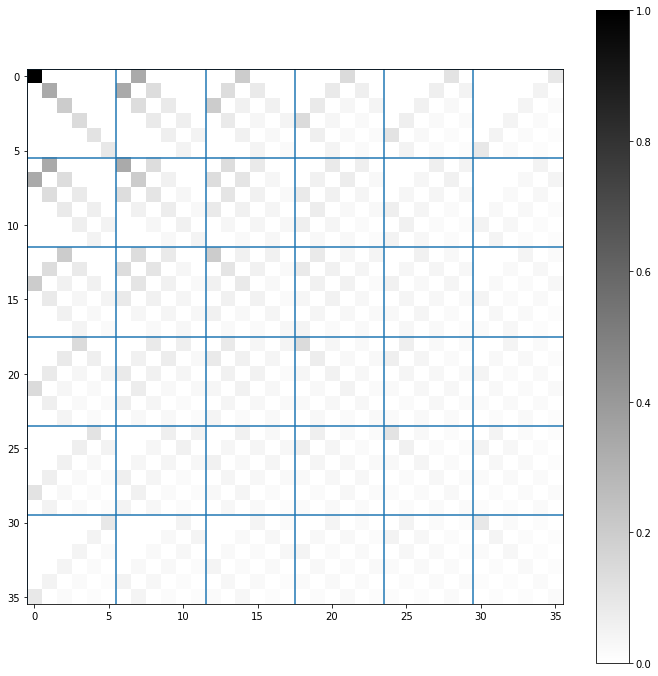

In [61]:
plt.figure(figsize=(12,12))
plt.imshow(w.astype(float).reshape(q**2, q**2), cmap='gray_r')
for i in range(q):
    plt.axvline(i*q-0.5)
    plt.axhline(i*q-0.5)
    
plt.colorbar()
plt.show()

(each $i,j$ sub-square shows the coefficients of $m_{i,j}$ for the final $\mathcal{M}$ matrix)


This still takes a little while to pre-compute, so it'd be nice to be able to understand the pattern here.

To do this, let's just treat the co-efficients as a qxqxqxq tensor.  By doing a bit of rearranging of that basis matrix function, we can see that it's actually computing the integral of four different legendre polynomials multiplied together.

That is, the coefficient tensor $W$ is just $W_{i,j,n,m} = \int_0^1p_i(t) p_j(t) p_n(t) p_m(t) dt$, where $p_x(t)$ is the xth shifted legendre polynomial. 

(Alternatively, $W_{i,j,n,m} = {1 \over 2} \int_{-1}^1P_i(t) P_j(t) P_n(t) P_m(t) dt$, where $P_x(t)$ is the xth normal legndre polynomial)

In [124]:
def m_element_method_1(q, i, j, n, m):
    P = sympy.Matrix([leg_poly(i) for i in range(q)])
    C = P*P.T
    m = (C[:,i]*C[j,:])[n,m]
    return sympy.integrate(m, (t, -1, 1))/2

# these are identical!

def m_element_method_2(q, i, j, n, m):
    return sympy.integrate(leg_poly(i)*leg_poly(j)*leg_poly(n)*leg_poly(m), (t, -1, 1))/2

This explains all the interesting symmetries in the matrix, but is still pretty slow to compute.  Mind you, it does indicate pretty clearly that we can do a lot of caching, since the order of the arguments doesn't matter at all.  Indeed, the result doesn't even depend on q!

In [133]:
import functools
@functools.lru_cache()
def m_element(i, j, n, m):
    return sympy.integrate(leg_poly(i)*leg_poly(j)*leg_poly(n)*leg_poly(m), (t, -1, 1))/2

def m_element_fast(i, j, n, m):
    args = tuple(sorted([i, j, n, m]))
    return m_element(*args)


q=6
w = np.zeros((q,q,q,q))
for i in range(q):
    for j in range(q):
        for m in range(q):
            for n in range(q):
                w[i,j,n,m] = m_element_fast(i,j,m,n)

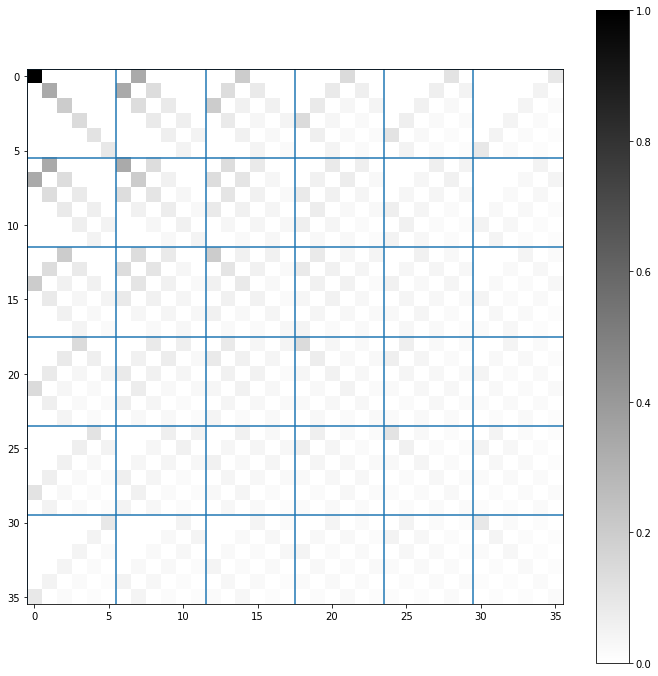

In [134]:
plt.figure(figsize=(12,12))
plt.imshow(w.astype(float).reshape(q**2, q**2), cmap='gray_r')
for i in range(q):
    plt.axvline(i*q-0.5)
    plt.axhline(i*q-0.5)
    
plt.colorbar()
plt.show()

So really, after all this, the conclusion is just exactly what the matrix math says.  

The equation

$\mathcal{M} = \int_0^1C_t M C_t dt $ (where $C_t = \mathcal{P}_t \times \mathcal{P}_t$ ) 

or in other terms:

$\mathcal{M} = \int_0^1\mathcal{P}_t \mathcal{P}_t^T  M \mathcal{P}_t^T \mathcal{P}_t dt $

just means this:

$\mathcal{M}_{i,j} = \sum_n \sum_m M_{n,m} \int_0^1 p_i(t) p_j(t) p_n(t) p_m(t) dt$


Yay math!


It'd still be nice to be able to quickly generate the result of those integrals, though....  Any ideas?